<a href="https://colab.research.google.com/github/HiroshiATakano/GitHub/blob/master/%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%81%8C%E6%9C%80%E9%AB%98%E3%81%AE%E5%AD%A6%E5%95%8F%E3%81%A7%E3%81%82%E3%82%8B%E3%80%8C%E6%95%B0%E5%AD%A6%E7%B7%A8%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%matplotlib inline

import pickle
import statsmodels.formula.api as smf
import pystan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect
from matplotlib import colors as mcolors
from pystan import StanModel
import pickle

import seaborn as sns
import sys
import math
from matplotlib.backends.backend_pdf import PdfPages
from scipy import stats
from scipy.stats import norm
import itertools

from statsmodels.formula.api import glm
import statsmodels.api as sm

sns.set()

import os

path = os.getcwd()

try:
    os.chdir(path + "/drive/My Drive/RとStanで始めるベイズ統計モデリングによるデータ分析入門")
except:
    pass

os.getcwd()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'/content/drive/My Drive/RとStanで始めるベイズ統計モデリングによるデータ分析入門'

In [4]:
import scipy as sp
print("Numpy",np.__version__)
print("Scipy",sp.__version__)

Numpy 1.18.5
Scipy 1.4.1


# 統計学が最強の学問である［数学編］

In [5]:
import sympy
x =sympy.Symbol('x')
y = sympy.Symbol('y')
a,b,c,p,q = sympy.symbols('a b c p q')

print(type(a))

<class 'sympy.core.symbol.Symbol'>


In [6]:
y1 = 12-5*x-y
y2 = 3-0.5*x-y

sympy.solve([y1,y2])


{x: 2.00000000000000, y: 2.00000000000000}

## 二項定理と組み合わせの数

(-10.0, 10.0)

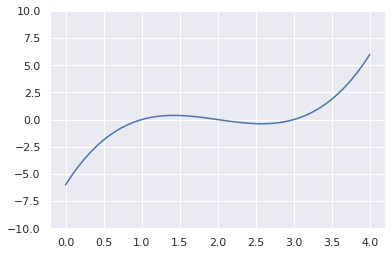

In [7]:
y = lambda x: -6+11*x-6*x**2+x**3
x = np.linspace(0,4,50)

plt.plot(x,y(x))
plt.ylim(-10,10)

(-10.0, 10.0)

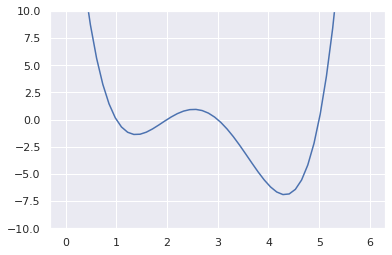

In [8]:
y = lambda x: 30-61*x+41*x**2-11*x**3+x**4
x = np.linspace(0,6,50)

plt.plot(x,y(x))
plt.ylim(-10,10)

In [9]:
x =sympy.Symbol('x')
y = sympy.Symbol('y')

print(sympy.expand((x+y)**2))
print(sympy.expand((x+y)**3))

print("16.3")
print("(x+y)**4 =  ", sympy.expand((x+y)**4))

x**2 + 2*x*y + y**2
x**3 + 3*x**2*y + 3*x*y**2 + y**3
16.3
(x+y)**4 =   x**4 + 4*x**3*y + 6*x**2*y**2 + 4*x*y**3 + y**4


In [10]:
list(itertools.product('xy',repeat=2))

[('x', 'x'), ('x', 'y'), ('y', 'x'), ('y', 'y')]

In [11]:
# 図表 3-4

list(itertools.product('xy',repeat=3))

[('x', 'x', 'x'),
 ('x', 'x', 'y'),
 ('x', 'y', 'x'),
 ('x', 'y', 'y'),
 ('y', 'x', 'x'),
 ('y', 'x', 'y'),
 ('y', 'y', 'x'),
 ('y', 'y', 'y')]

In [12]:
list(itertools.combinations_with_replacement('xy',3))

[('x', 'x', 'x'), ('x', 'x', 'y'), ('x', 'y', 'y'), ('y', 'y', 'y')]

In [13]:
# 図表 3-5
list(itertools.product('xy',repeat=4))

[('x', 'x', 'x', 'x'),
 ('x', 'x', 'x', 'y'),
 ('x', 'x', 'y', 'x'),
 ('x', 'x', 'y', 'y'),
 ('x', 'y', 'x', 'x'),
 ('x', 'y', 'x', 'y'),
 ('x', 'y', 'y', 'x'),
 ('x', 'y', 'y', 'y'),
 ('y', 'x', 'x', 'x'),
 ('y', 'x', 'x', 'y'),
 ('y', 'x', 'y', 'x'),
 ('y', 'x', 'y', 'y'),
 ('y', 'y', 'x', 'x'),
 ('y', 'y', 'x', 'y'),
 ('y', 'y', 'y', 'x'),
 ('y', 'y', 'y', 'y')]

#### 順列

In [14]:
# 図表 3-6
list(itertools.permutations('1234',2))

[('1', '2'),
 ('1', '3'),
 ('1', '4'),
 ('2', '1'),
 ('2', '3'),
 ('2', '4'),
 ('3', '1'),
 ('3', '2'),
 ('3', '4'),
 ('4', '1'),
 ('4', '2'),
 ('4', '3')]

In [15]:
# 図表 3-7
list(itertools.permutations('abc',3))

[('a', 'b', 'c'),
 ('a', 'c', 'b'),
 ('b', 'a', 'c'),
 ('b', 'c', 'a'),
 ('c', 'a', 'b'),
 ('c', 'b', 'a')]

In [16]:
# 階乗の計算

import math

def fact(n):
  if n == 0: return 1
  return n*fact(n-1)

print(fact(3))

print(math.factorial(3))

6
6


### 二項定理の計算

In [17]:
def calc(k):
  return [math.factorial(k)/(math.factorial(i)*math.factorial(k-i)) for i in range(k+1)]

calc(4)

[1.0, 4.0, 6.0, 4.0, 1.0]

In [18]:
from scipy.special import comb

n = 4

print([comb(n,i,exact=True ) for i in range(n+1)])

[1, 4, 6, 4, 1]


## 二項定理と組み合わせの数から複雑な確率計算へ

In [19]:
import matplotlib as mpl
print(mpl.rcParams['font.family'])

['sans-serif']


Text(0.5, 1.0, '3-8')

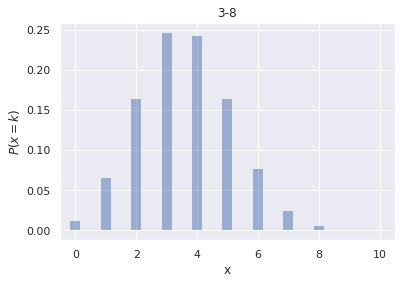

In [20]:
from scipy.stats import binom

p = 0.36
N = 10

k = np.arange(N+1)

fig, ax = plt.subplots(1,1)
ax.vlines(k,0,binom.pmf(k,N,p),color='b',lw=10,alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('$ P(x=k) $')
ax.set_title("3-8")

In [21]:
k = 0
binom.pmf(k,N,p)

0.01152921504606847

In [22]:
k = 1
binom.pmf(k,N,p)

0.0648518346341352

In [23]:
k = 2
binom.cdf(k,N,p)

0.24053725609785823

# 掛け算と割り算を楽にする指数の考え方

(0.0, 10.0)

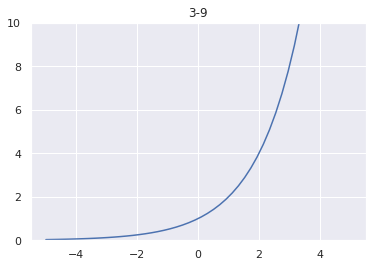

In [24]:
y = lambda x: 2**x

x = np.linspace(-5,5,50)
plt.plot(x,y(x))
plt.title('3-9')
plt.ylim(0,10)

(0.0, 10.0)

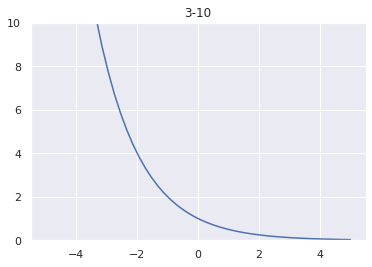

In [25]:
y = lambda x: 1/2**x

x = np.linspace(-5,5,50)
plt.plot(x,y(x))
plt.title('3-10')
plt.ylim(0,10)

## 計算機を作り始めた男

In [26]:
x = np.arange(11,101)/10
df = pd.DataFrame({'x':x,'log10(x)': np.log10(x)})

In [27]:
df[df['x'].isin([6,7.8])]

,x,log10(x)
49,6.0,0.778151
67,7.8,0.892095


In [28]:
df[df['x'].isin([2,1.4])]

,x,log10(x)
3,1.4,0.146128
9,2.0,0.301030


In [29]:
df.query('x==[2,1.4]')

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,x,log10(x)
3,1.4,0.146128
9,2.0,0.301030


In [30]:
import matplotlib
print(matplotlib.matplotlib_fname())

/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc


## 対数の性質と計算のためのルール

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


(-5.0, 5.0)

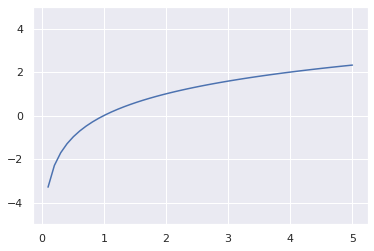

In [31]:
y = lambda x: np.log2(x)
x = np.linspace(0,5,50)

plt.plot(x,y(x))
plt.ylim(-5,5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


(-5.0, 5.0)

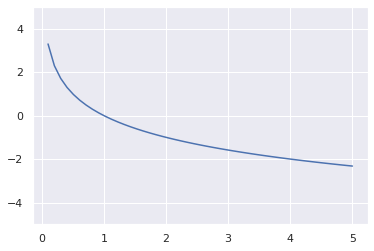

In [32]:
y = lambda x: np.log(x)/np.log(0.5)
x = np.linspace(0,5,50)

plt.plot(x,y(x))
plt.ylim(-5,5)

$ x = y $ <=> $ log_a x = log_a y $

$ log_a xy = log_a x + log_a y $

$ log_a \dfrac{x}{y} = log_a x - log_a y $

$ log_a x^n = n log_a x $

$ log_a \sqrt{x} = log_a x^\frac{1}{2}  = \frac{1}{2} log_a x $

$ log_a x = \dfrac{log_b x}{log_b a} $

## ネイピア数 $ e $ の意味とロジスティック回帰

$ \displaystyle e = \lim_{x \to \infty} \left( 1+ \dfrac{1}{n} \right)^n $ 

$ log \dfrac{p}{1-p} = a + bx $

Text(0.5, 1.0, '3-15')

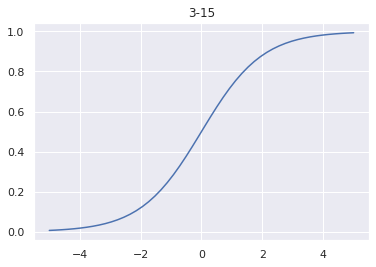

In [33]:
y = lambda x: 1/(1+np.exp(-x))
x = np.linspace(-5,5,50)

plt.plot(x,y(x))
plt.title('3-15')

# 三平方の定理とデータの「距離」

In [34]:
cities = np.array([[43.062083, 141.354389], # 札幌
                   [38.268056, 140.869722], # 仙台
                   [35.689472, 139.69175], # 東京
                   [35.181389, 136.906389], # 名古屋
                   [34.69375, 135.502111], # 大阪
                   [34.38525, 132.455306], # 広島
                   [33.590139, 130.401722], # 福岡
                   [26.213083, 127.678056]]) # 那覇

cities

array([[ 43.062083, 141.354389],
       [ 38.268056, 140.869722],
       [ 35.689472, 139.69175 ],
       [ 35.181389, 136.906389],
       [ 34.69375 , 135.502111],
       [ 34.38525 , 132.455306],
       [ 33.590139, 130.401722],
       [ 26.213083, 127.678056]])

In [35]:
all_diffs = np.expand_dims(cities,axis=1) - np.expand_dims(cities,axis=0)
digree_distance = np.sqrt(np.sum(all_diffs**2,axis=-1))
distance = (101*digree_distance).astype(np.int32)
distance

array([[   0,  486,  763,  913, 1031, 1255, 1462, 2191],
       [ 486,    0,  286,  507,  651,  935, 1158, 1804],
       [ 763,  286,    0,  285,  434,  742,  961, 1545],
       [ 913,  507,  285,    0,  150,  456,  676, 1299],
       [1031,  651,  434,  150,    0,  309,  527, 1165],
       [1255,  935,  742,  456,  309,    0,  222,  956],
       [1462, 1158,  961,  676,  527,  222,    0,  794],
       [2191, 1804, 1545, 1299, 1165,  956,  794,    0]], dtype=int32)

In [36]:
a = cities[1]
b = cities[0]
np.linalg.norm(a-b)*101

486.66488138007367

In [37]:
pd.DataFrame(distance, index=["札幌","仙台","東京","名古屋","大阪","広島","福岡","那覇"],columns=["札幌","仙台","東京","名古屋","大阪","広島","福岡","那覇"])

,札幌,仙台,東京,名古屋,大阪,広島,福岡,那覇
札幌,0,486,763,913,1031,1255,1462,2191
仙台,486,0,286,507,651,935,1158,1804
東京,763,286,0,285,434,742,961,1545
名古屋,913,507,285,0,150,456,676,1299
大阪,1031,651,434,150,0,309,527,1165
広島,1255,935,742,456,309,0,222,956
福岡,1462,1158,961,676,527,222,0,794
那覇,2191,1804,1545,1299,1165,956,794,0


In [38]:
array_ = np.array(cities, dtype=int)[1:3,:1]
array_.shape

(2, 1)

In [39]:
np.expand_dims(array_,axis=1).shape

(2, 1, 1)

In [40]:
np.expand_dims(array_,axis=0) .shape

(1, 2, 1)

In [41]:
np.expand_dims(array_,axis=1) - np.expand_dims(array_,axis=0) 

array([[[ 0],
        [ 3]],

       [[-3],
        [ 0]]])

In [42]:
a = np.arange(6).reshape(3,2)
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [43]:
a_ = np.expand_dims(a,axis=0)
a_

array([[[0, 1],
        [2, 3],
        [4, 5]]])

In [44]:
b = np.expand_dims(a,axis=1)
b

array([[[0, 1]],

       [[2, 3]],

       [[4, 5]]])

In [45]:
c = a_-b
c

array([[[ 0,  0],
        [ 2,  2],
        [ 4,  4]],

       [[-2, -2],
        [ 0,  0],
        [ 2,  2]],

       [[-4, -4],
        [-2, -2],
        [ 0,  0]]])

In [46]:
np.sqrt(np.sum(c**2,axis=-1))

array([[0.        , 2.82842712, 5.65685425],
       [2.82842712, 0.        , 2.82842712],
       [5.65685425, 2.82842712, 0.        ]])

## 幾何学に対する代数の力業


In [47]:
1/2*12*14*np.sin(1/6*np.pi)

41.99999999999999

In [48]:
np.sin(1/6*np.pi)

0.49999999999999994


## 拡張された三角関数の定義

In [49]:
d = np.arange(0,370,30)
d.dtype

dtype('int64')

In [50]:
r = np.radians(d/np.pi)

r

array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        , 1.16666667, 1.33333333, 1.5       ,
       1.66666667, 1.83333333, 2.        ])

In [51]:
from fractions import Fraction
f_ =np.zeros(len(d)).astype(str)
print(f_)

for i in np.arange(len(d)):
  f = Fraction(str(r[i]))
  f_[i] = str(f.limit_denominator(50))
f_


['0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0']


array(['0', '1/6', '1/3', '1/2', '2/3', '5/6', '1', '7/6', '4/3', '3/2',
       '5/3', '11/6', '2'], dtype='<U32')

In [52]:
df = pd.DataFrame({'度数法':d,'弧度法':f_})

In [53]:
df['sin'] = np.sin(np.radians(d))
df['cos'] = np.cos(np.radians(d))
df

,度数法,弧度法,sin,cos
0,0,0,0.000000e+00,1.000000e+00
1,30,1/6,5.000000e-01,8.660254e-01
2,60,1/3,8.660254e-01,5.000000e-01
3,90,1/2,1.000000e+00,6.123234e-17
4,120,2/3,8.660254e-01,-5.000000e-01
5,150,5/6,5.000000e-01,-8.660254e-01
6,180,1,1.224647e-16,-1.000000e+00
7,210,7/6,-5.000000e-01,-8.660254e-01
8,240,4/3,-8.660254e-01,-5.000000e-01
9,270,3/2,-1.000000e+00,-1.836970e-16


# 統計学と機械学習のための $ \Sigma $ 、ベクトル、行列


## たくさんの数をまとめて書きたい

In [54]:
n = np.array([98,99,96,91,99,91,94,93,99,90])
c = 90
np.mean(n)

95.0

In [55]:
n-c

array([8, 9, 6, 1, 9, 1, 4, 3, 9, 0])

In [56]:
c+np.mean(n-c)

95.0

In [57]:
pd.DataFrame({'調査協力者':[str(i+1)+'人目' for i in np.arange(len(n))],'満足度':n, })

,調査協力者,満足度
0,1人目,98
1,2人目,99
2,3人目,96
3,4人目,91
4,5人目,99
5,6人目,91
6,7人目,94
7,8人目,93
8,9人目,99
9,10人目,90


## $ \Sigma $ より高密度に書くためのベクトル入門

## ベクトルの内積と $ \Sigma $ の関係

## 同時確率

$ Px(x,y) $

In [58]:
argvs = sys.argv
P = np.array([[0.15,0.1,0.1,0.01],[0.1,0.2,0.05,0.04],[0.05,0,0.1,0.1]])
Y = ["男子","女子","教員"]
X = [" ","自転車","徒歩","電車","車"]

df = pd.DataFrame(P, columns=X[1:],index=Y)
df['s_sum'] = df.sum(axis=1)
df= pd.concat([df,pd.DataFrame(df.sum(axis=0),columns=['G_ttl']).T])
df

,自転車,徒歩,電車,車,s_sum
男子,0.15,0.1,0.10,0.01,0.36
女子,0.10,0.2,0.05,0.04,0.39
教員,0.05,0.0,0.10,0.10,0.25
G_ttl,0.30,0.3,0.25,0.15,1.00


In [59]:
[df[col].sum() for col in df]

[0.6, 0.6000000000000001, 0.5, 0.30000000000000004, 2.0]

In [60]:
for c in df:
  print(c)

自転車
徒歩
電車
車
s_sum


In [61]:
for j in range(3):  
  for i in range(4):
    conditional_probability = P[j][i]/sum(P[j])
    print(conditional_probability)
  print("")

0.4166666666666667
0.2777777777777778
0.2777777777777778
0.02777777777777778

0.25641025641025644
0.5128205128205129
0.12820512820512822
0.10256410256410256

0.2
0.0
0.4
0.4



In [62]:
Pr_y = [0 for i in range(len(P))]
for i, y in enumerate(P):
  for j, x in enumerate(y):
    Pr_y[i] += x
print("Pr(y) : ", Pr_y)


Pr_x = [0 for i in range(len(P[0]))]
for i, y in enumerate(P):
  for j, x in enumerate(y):
    Pr_x[j] += x
print("Pr(x) : ", Pr_x)

total = 0

for y in range(len(P)):
  print("y = ",y)

  conditional_probability = P[y][i]/sum(P[y])
  likelyhood = conditional_probability
  prior = Pr_y[y]
  evidence = Pr_x[2]
  bayes = likelyhood*prior/evidence
  total += bayes
  print("likelyhood : ", likelyhood)
  print("prior ; ", prior)
  print("evidence : ", evidence)
  print("bayes : ", bayes)
  

Pr(y) :  [0.36, 0.39, 0.25]
Pr(x) :  [0.3, 0.30000000000000004, 0.25, 0.15000000000000002]
y =  0
likelyhood :  0.2777777777777778
prior ;  0.36
evidence :  0.25
bayes :  0.4
y =  1
likelyhood :  0.12820512820512822
prior ;  0.39
evidence :  0.25
bayes :  0.20000000000000004
y =  2
likelyhood :  0.4
prior ;  0.25
evidence :  0.25
bayes :  0.4
